In [1]:
%pip install fredapi
%pip install pandas_datareader
import pandas_datareader.data as web
import datetime
import pandas as pd
from fredapi import Fred
fred = Fred(api_key="589cf170582c78433b3c562dad988b45")


Note: you may need to restart the kernel to use updated packages.



# Key Macroeconomic FRED Series

This document summarizes five major macroeconomic indicators from FRED, including their definitions, calculation methods, frequency, and common uses in forecasting.

---

## 1️⃣ GNPCA — Real Gross National Product (Billions of Chained 2017 Dollars)

**What it measures:**  
- Total economic output produced by **U.S. residents**, including income from abroad.

**How it’s calculated:**  
$
\text{GNP} = \text{GDP} + \text{Net income from abroad}
$  
- **GDP**: Value of goods/services produced domestically.  
- **Net income from abroad**: Income residents earn from foreign investments minus income foreigners earn from U.S. investments.  

**Real vs Nominal:**  
- “Real” = inflation-adjusted to **2017 dollars** using chain-weighted price indexes.

**Frequency:** Annual  
**Source:** BEA (Bureau of Economic Analysis)  
**Notes:** Useful for long-term economic growth analysis; smoother than GDP due to inclusion of net foreign income.

---

## 2️⃣ GDP — Gross Domestic Product (Billions of Dollars)

**What it measures:**  
- Total value of goods and services **produced within U.S. borders**, regardless of producer nationality.

**How it’s calculated:**  
1. **Expenditure approach:**  
$
GDP = C + I + G + (X - M)
$  
- \(C\) = Consumption  
- \(I\) = Investment  
- \(G\) = Government spending  
- \(X - M\) = Exports minus Imports  

2. **Income approach:** Sum of wages, rents, interest, profits, and taxes minus subsidies.  
3. **Production approach:** Sum of value added at each production stage.

**Real vs Nominal:**  
- Real GDP = inflation-adjusted (usually chained dollars, e.g., 2017)  

**Frequency:** Quarterly / Annual  
**Source:** BEA  
**Notes:** Standard measure of economic growth.

---

## 3️⃣ UNRATE — Civilian Unemployment Rate (%)

**What it measures:**  
- % of the **civilian labor force that is unemployed but actively seeking work**.

**How it’s calculated:**  
$
\text{Unemployment Rate} = \frac{\text{Unemployed}}{\text{Labor Force}} \times 100
$  
- Labor force = employed + unemployed  
- Data from **Current Population Survey (CPS)** by BLS.

**Frequency:** Monthly  
**Seasonal adjustment:** Usually seasonally adjusted for short-term cycles.  

**Notes:** Leading indicator of economic health; used for inflation and monetary policy analysis.

---

## 4️⃣ CPIAUCSL — Consumer Price Index for All Urban Consumers: All Items (Index, 1982-84=100)

**What it measures:**  
- Average change in **prices paid by urban consumers** for a **fixed basket of goods & services**.

**How it’s calculated:**  
- Prices of ~80,000 items surveyed monthly across urban areas.  
- Basket weights based on expenditure patterns.  
- Index formula (Laspeyres-type):  
$
CPI = \frac{\sum p_t q_0}{\sum p_0 q_0} \times 100
$  
- \(p_t\) = price at time t, \(q_0\) = base-period quantities  

**Frequency:** Monthly  
**Seasonal adjustment:** Available (NSA and SA)  

**Notes:** Main inflation measure; used for real-dollar conversions and cost-of-living adjustments.

---

## 5️⃣ INDPRO — Industrial Production Index (2007=100)

**What it measures:**  
- Output of **manufacturing, mining, and utilities** in the U.S.  

**How it’s calculated:**  
- Uses **physical output data** from factories, mines, and utilities.  
- Weighted to reflect contribution to GDP:  
$
\text{INDPRO Index} = \frac{\text{Current production}}{\text{Base year production}} \times 100
$  
- Base year: 2007 = 100.

**Frequency:** Monthly  
**Seasonal adjustment:** Available  

**Notes:** Leading indicator of industrial activity; often used to forecast GDP cycles.

---

## ✅ Quick Comparison Table

| Series ID  | Metric Type | Frequency | Real/Nominal | Source | Key Use |
|------------|------------|-----------|--------------|--------|---------|
| GNPCA      | Total output (residents) | Annual | Real (2017 chained $) | BEA | Long-term growth analysis |
| GDP        | Total domestic output | Quarterly/Annual | Real or Nominal | BEA | Standard economic growth measure |
| UNRATE     | % Unemployed | Monthly | NA | BLS | Labor market, cyclical indicator |
| CPIAUCSL   | Price index | Monthly | Nominal (Index) | BLS | Inflation, real dollar conversion |
| INDPRO     | Industrial output | Monthly | Index (2007=100) | FED | Leading indicator for industrial & GDP trends |


In [2]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2025, 9, 1)

series_ids = ['GNPCA','GDP', 'UNRATE', 'CPIAUCSL', 'INDPRO']


df_fred = web.DataReader(series_ids, 'fred', start, end)

print(df_fred.head())
df_fred["GDP"].size


                GNPCA        GDP  UNRATE  CPIAUCSL   INDPRO
DATE                                                       
2000-01-01  14144.962  10002.179     4.0     169.3  91.4092
2000-02-01        NaN        NaN     4.1     170.0  91.7245
2000-03-01        NaN        NaN     4.0     171.0  92.0830
2000-04-01        NaN  10247.720     3.8     170.9  92.6659
2000-05-01        NaN        NaN     4.0     171.2  92.9347


308

In [3]:

# Vintage Data
vintage = []

for i in series_ids:
    vindata = fred.get_series(i, observation_start="2000-01-01" ,observation_end="2025-09-01")
    vintage.append(vindata)
print(len(vintage))
df_vintage = pd.DataFrame(vintage).T
df_vintage.columns = series_ids
print(df_vintage)
df_vintage["GDP"].size

5
                GNPCA        GDP  UNRATE  CPIAUCSL    INDPRO
2000-01-01  14144.962  10002.179     4.0   169.300   91.4092
2000-02-01        NaN        NaN     4.1   170.000   91.7245
2000-03-01        NaN        NaN     4.0   171.000   92.0830
2000-04-01        NaN  10247.720     3.8   170.900   92.6659
2000-05-01        NaN        NaN     4.0   171.200   92.9347
...               ...        ...     ...       ...       ...
2025-04-01        NaN  30353.902     4.2   320.321  103.6224
2025-05-01        NaN        NaN     4.2   320.580  103.6570
2025-06-01        NaN        NaN     4.1   321.500  104.2115
2025-07-01        NaN        NaN     4.2   322.132  103.8194
2025-08-01        NaN        NaN     4.3   323.364  103.9203

[308 rows x 5 columns]


308

In [4]:
def nancounter(id, df):
    return df[id].isna().sum()

def valuecounter(id,df):
    return df[id].value_counts()



# High Frequency data

In [5]:
jobless_claims = fred.get_series("ICSA")
print(jobless_claims.tail())

sp500 = fred.get_series("SP500")
print(sp500.tail())

yields = pd.DataFrame({
    "1Y": fred.get_series("DGS1"),
    "2Y": fred.get_series("DGS2"),
    "10Y": fred.get_series("DGS10"),
    "30Y": fred.get_series("DGS30"),
})
print(yields.tail())

2025-08-16    234000.0
2025-08-23    229000.0
2025-08-30    236000.0
2025-09-06    264000.0
2025-09-13    231000.0
dtype: float64
2025-09-15    6615.28
2025-09-16    6606.76
2025-09-17    6600.35
2025-09-18    6631.96
2025-09-19    6664.36
dtype: float64
              1Y    2Y   10Y   30Y
2025-09-12  3.66  3.56  4.06  4.68
2025-09-15  3.64  3.54  4.05  4.66
2025-09-16  3.62  3.51  4.04  4.65
2025-09-17  3.60  3.52  4.06  4.66
2025-09-18  3.61  3.57  4.11  4.72


# Plots and Graphs

Note: you may need to restart the kernel to use updated packages.


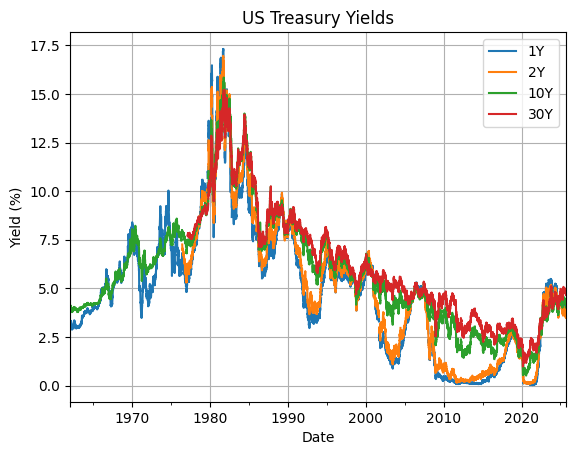

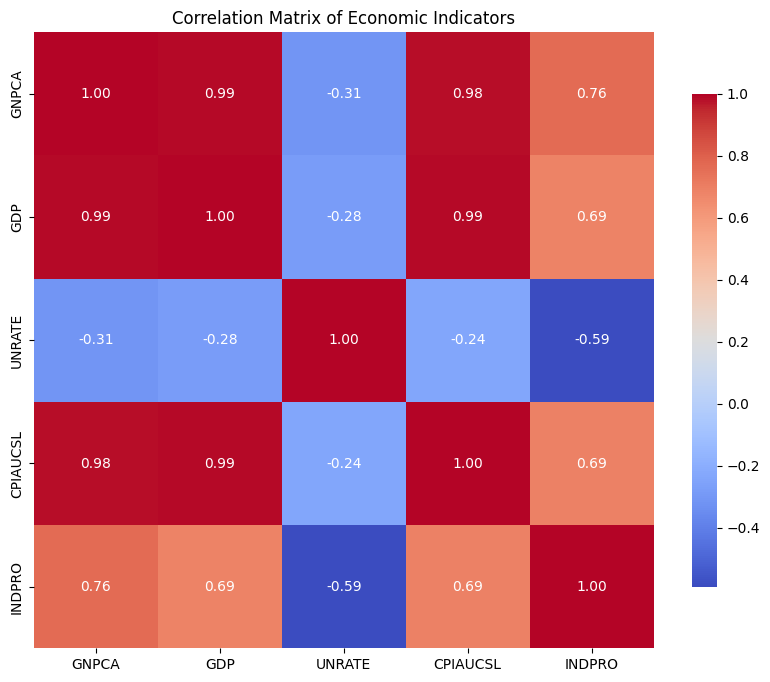

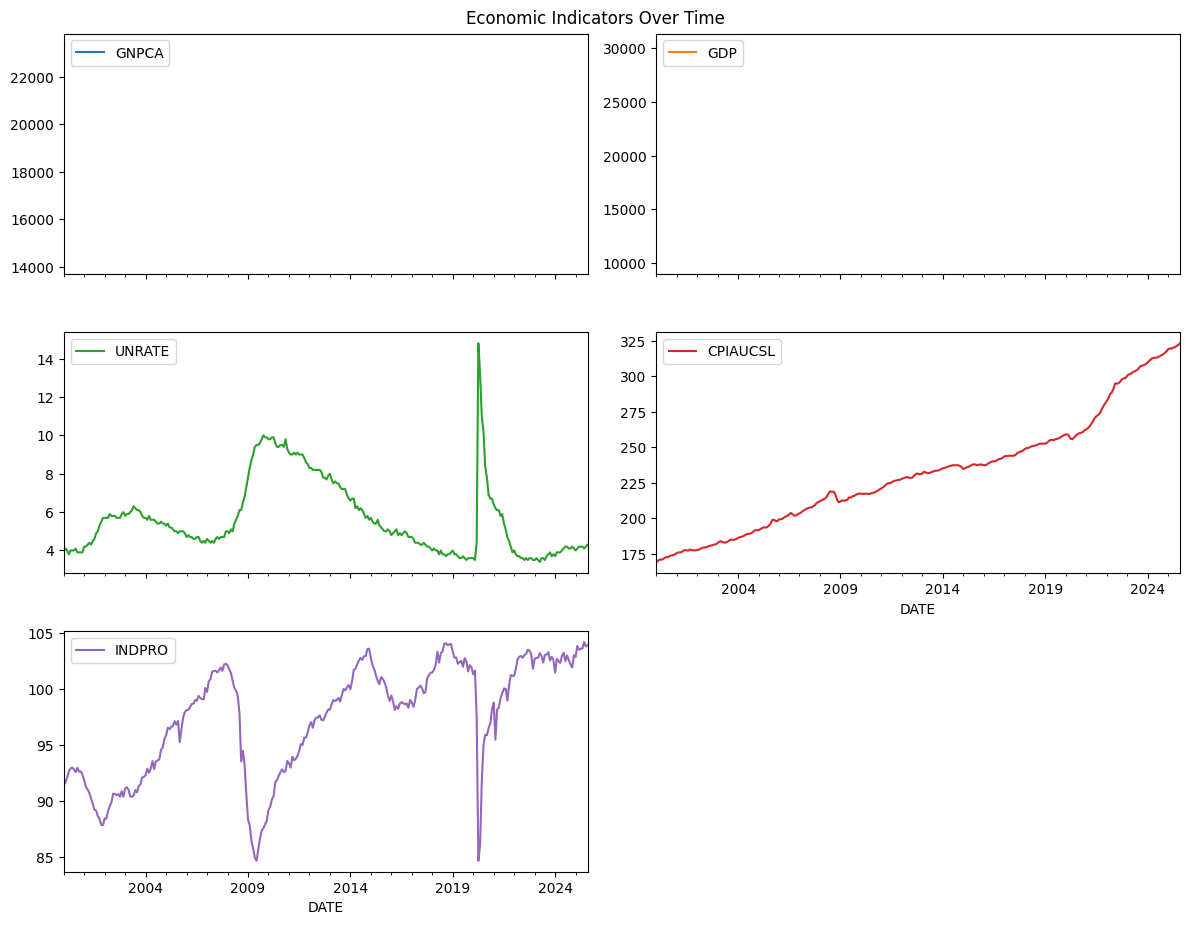

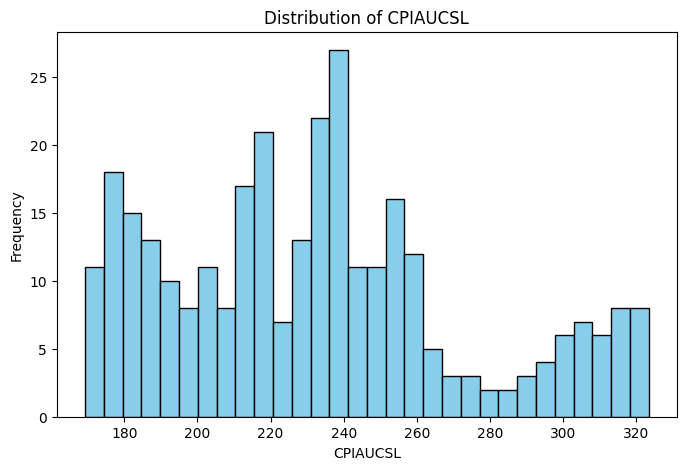

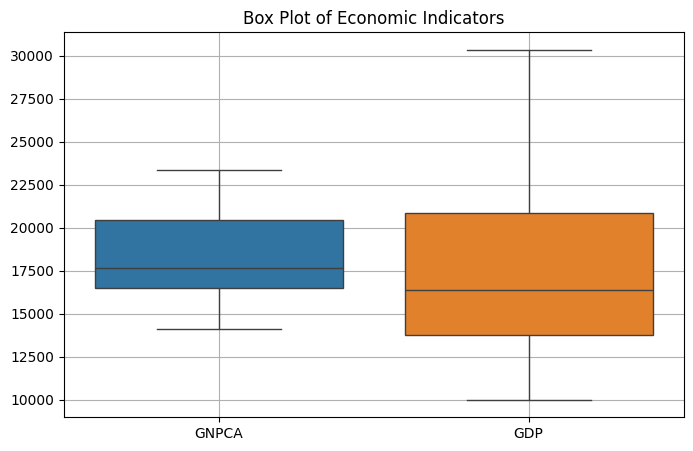

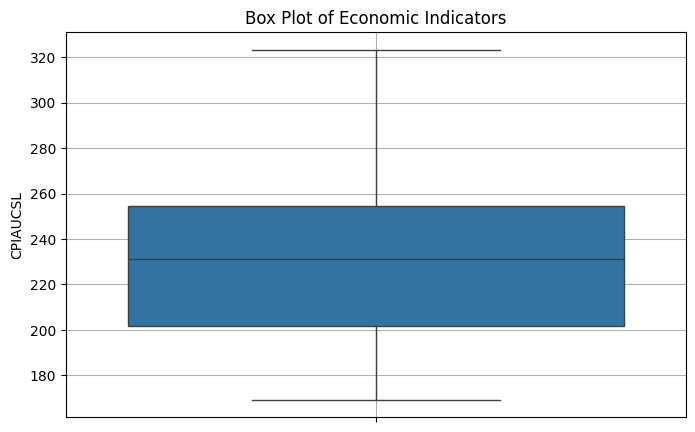

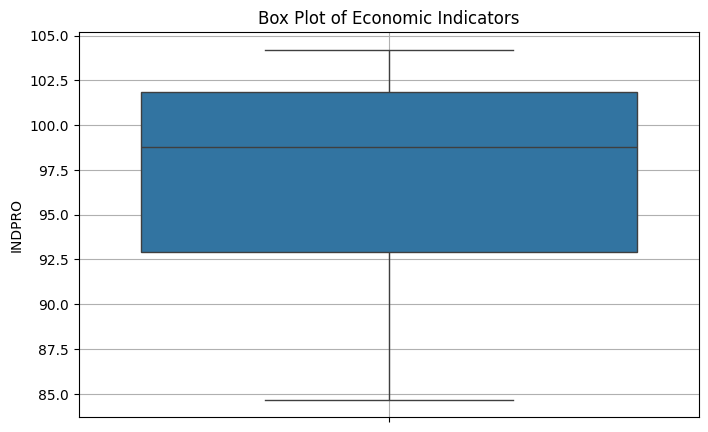

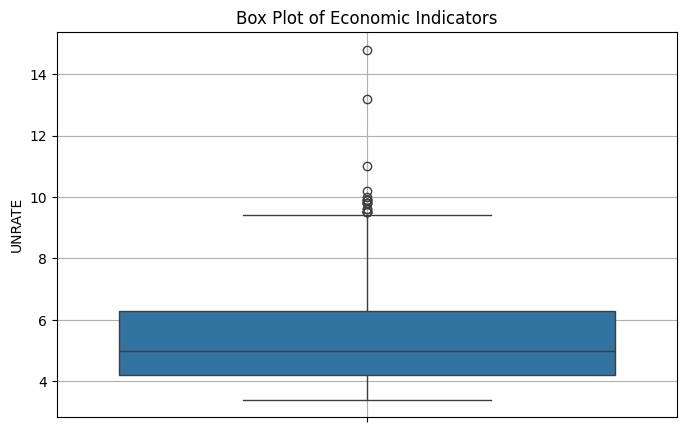

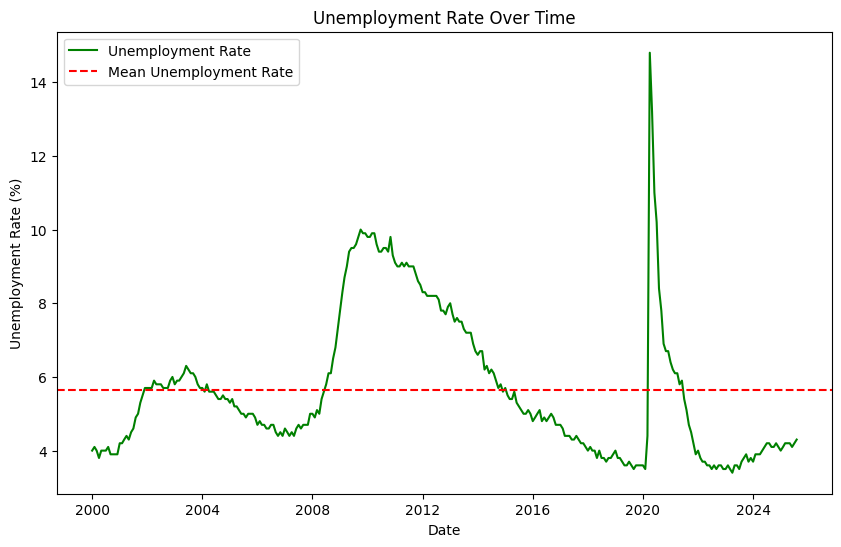

In [ ]:
%pip install matplotlib seaborn
import matplotlib.pyplot as plt

dataframe_choice = None


yields.plot(title="US Treasury Yields")
plt.xlabel("Date")
plt.ylabel("Yield (%)")
plt.grid()
plt.show()

# Correlation Matrix

import seaborn as sns
corr = dataframe_choice.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Economic Indicators")
plt.show()
# Time Series Plot
df_fred.plot(subplots=True, layout=(4, 2), figsize=(12, 12), title="Economic Indicators Over Time")
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(8, 5))
dataframe_choice['CPIAUCSL'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of CPIAUCSL')
plt.xlabel('CPIAUCSL')
plt.ylabel('Frequency')
plt.grid()
plt.show()
# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataframe_choice[['GNPCA', 'GDP']])
plt.title('Box Plot of Economic Indicators')
plt.grid()
plt.show()
#Box Plot with other features that dont have same scale as GDP and GNPCA
plt.figure(figsize=(8, 5))
sns.boxplot(data=dataframe_choice['CPIAUCSL'])
plt.title('Box Plot of Economic Indicators')
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=dataframe_choice['INDPRO'])
plt.title('Box Plot of Economic Indicators')
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=dataframe_choice['UNRATE'])
plt.title('Box Plot of Economic Indicators')
plt.grid()
plt.show()

# Line Plot with Annotations
plt.figure(figsize=(10, 6))
plt.plot(dataframe_choice['UNRATE'], label='Unemployment Rate', color='green')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.axhline(y=dataframe_choice['UNRATE'].mean(), color='red', linestyle='--', label='Mean Unemployment Rate')
plt.legend()        